In [25]:
import pickle
user = []
user_item_dict = {}
user_node_set = set()
item_node_set = set()
node2hist = dict()
data = {
    'user_id': [],
    'item_id': [],
    'interaction_count': []
}
with open('foursquare/TKY/tr-user-item-time-top9000-min100-max500-hour.lst','r') as infile:
   for line in infile:          
        # print(line)
        parts = line.split()
        s_node = int(parts[0])  # source node
        t_node = int(parts[1])  # target node
        time_stamp = float(parts[2])  # time slot, delta t
        t_loc_x = float(parts[3])
        t_loc_y = float(parts[4])
        # update将元素添加到set，可以添加多个元素
        # self.node_set.update([s_node, t_node])
        if s_node not in user_item_dict:
            user_item_dict[s_node] = set()
        user_item_dict[s_node].add(t_node)
        
        
        user_node_set.add(s_node)
        item_node_set.add(t_node)

        if s_node not in node2hist:
            node2hist[s_node] = list()
        node2hist[s_node].append((t_node, time_stamp, t_loc_x, t_loc_y))

#         if not directed:  # 非有向图，一条边的数据需要添加两次
#             if t_node not in self.node2hist:
#                 self.node2hist[t_node] = list()
#             self.node2hist[t_node].append((s_node, time_stamp, t_loc_x, t_loc_y))

        # if d_time > self.max_d_time:
        #     self.max_d_time = d_time

#         if s_node not in self.degrees:
#             self.degrees[s_node] = 0
#         if t_node not in self.degrees:
#             self.degrees[t_node] = 0
#         self.degrees[s_node] += 1
#         self.degrees[t_node] += 1

    # self.node_dim = len(self.node_set)  # 所有节点数目
    # 有些节点被过滤掉了，因此根据数据集处理过程，指定node个数
#     node_dim = self.user_count + self.item_count  # 所有节点数目
# 所有边的数目
data_size = 0
for s in node2hist:
    hist = node2hist[s]
    hist = sorted(hist, key=lambda x: x[1])  # 历史节点按照时间排序
    node2hist[s] = hist
    data_size += len(node2hist[s])

In [27]:
len(user_node_set)

1567

In [28]:
data_size

321879

In [ ]:
# 创建示例数据
data = {
    'user_id': [],
    'item_id': [],
    'interaction_count': []
}

# 构建 DataFrame
df = pd.DataFrame(data)

# 打印 DataFrame
print(df)

In [ ]:
import pandas as pd

# 假设你有一个数据集，其中包含用户和项目的交互数据，类似以下格式：
# user_id | item_id | interaction_count
# -------------------------------------
#    1    |    A    |       5
#    1    |    B    |       3
#    2    |    A    |       2
#    2    |    C    |       7
#    ...  |   ...   |      ...

# 读取数据集（假设数据集是CSV格式）
data = pd.read_csv('your_dataset.csv')

# 计算每个项目的总交互次数，得到流行度信息
popularity = data.groupby('item_id')['interaction_count'].sum().reset_index()

# 按流行度降序排列
popularity = popularity.sort_values(by='interaction_count', ascending=False)

# 打印流行度信息（前N个项目）
print(popularity.head(10))

In [205]:
import pandas as pd
import copy
import pickle
# data = pd.read_table('/data/wanghe/wyx/MHPE/gowalla/Gowalla_totalCheckins.txt',sep='\t',
#                        error_bad_lines=False,
#                        header=None,
#                        names=['user_id', 'item_id', 'item_cat_id', 'item_cat_name', 'latitude',
#                               'longitude', 'time_zone_offset', 'timestamp'],
#                        quotechar=None, quoting=3, encoding='ISO-8859-1')
data = pd.read_csv('/data/wanghe/wyx/MHPE/foursquare/NYC/dataset_TSMC2014_NYC.txt', sep='\t',
                       error_bad_lines=False,
                       header=None,
                       names=['user_id', 'item_id', 'item_cat_id', 'item_cat_name', 'latitude',
                              'longitude', 'time_zone_offset', 'timestamp'],
                       quotechar=None, quoting=3, encoding='ISO-8859-1')
user_group = data.groupby(['user_id']) # 1083
count = 0
total = len(user_group)
# # # short sequence comes first
item2index_path = '/data/wanghe/wyx/MHPE/foursquare/NYC/foursquare_item2index_topi9000_topu2000'
index2item_path = '/data/wanghe/wyx/MHPE/foursquare/NYC/foursquare_index2item_topi9000_topu2000'
item2index = pickle.load(open(item2index_path, 'rb'))
index2item = pickle.load(open(index2item_path, 'rb'))
# # for user_id, length in user_group.size().sort_values().iteritems():
# #     count += 1
# #     if ('user_' + str(user_id)) not in item2index:
# #         continue
# #     if count % 100 == 0:
# #         print("=====count %d/%d======" % (count, total))
# #         print('%s %d' % (user_id, length))
# #     print(user_id, length)
# #     temp_user_data = user_group.get_group(user_id)
# #     old_time_seq = copy.deepcopy(pd.to_datetime(temp_user_data['timestamp']))
# #     temp_user_data.loc[:, 'timestamp_new'] = old_time_seq
# #     user_data = temp_user_data.sort_values(by='timestamp_new')
# #     paper_seq = user_data['item_id']
# #     loc_lat_seq = user_data['latitude']
# #     loc_lon_seq = user_data['longitude']
# #     time_seq = user_data['timestamp_new']
# #     paper_seq = paper_seq[paper_seq.notnull()]
# #     time_seq = time_seq[time_seq.notnull()]
# #     print(paper_seq)
# #     break

/home/wanghe/miniconda3/envs/tran/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


10083

In [259]:
import torch
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon_1, lat_1, lon_2, lat_2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    distances = []
    for j in range(lon_1.shape[0]):
        print("j: ", j)
        
        distance = []
        for i in range(lon_2.shape[1]):
            print("i: ", i)
            lon1, lat1, lon2, lat2 = map(radians, [lon_1[j], lat_1[j], lon_2[j,i], lat_2[j,i]])
            dlon = abs(lon2 - lon1)
            dlat = abs(lat2 - lat1)
            a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
            c = 2 * asin(sqrt(a))
            r = 6371
            distance.append(c * r)
            print(distance)
        distances.append(distance)
    return distances

def haversine_2(lon_1, lat_1, lon_2, lat_2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
        # 定义 radians 函数
    def radians(degrees):
        return degrees * (math.pi / 180)
    # 使用 torch.Tensor.apply_() 将 radians 函数应用到每个元素
    lon_1.apply_(radians)
    lat_1.apply_(radians)
    lon_2.apply_(radians)
    lat_2.apply_(radians)
    
   
    dlon = torch.abs(lon_2 - lon_1)
    dlat = torch.abs(lat_2 - lat_1)
    a = torch.sin(dlat / 2) ** 2 + torch.cos(lat_1) * torch.cos(lat_2) * torch.sin(dlon / 2) ** 2
    c = 2 * torch.asin(torch.sqrt(a))
    r = 6371

    return c * r


# 示例数据（假设是 PyTorch 张量）
lon_1 = torch.tensor([10.0, 20.0, 30.0])
lat_1 = torch.tensor([40.0, 50.0, 60.0])
lon_2 = torch.tensor([[15.0, 25.0, 35.0], [45.0, 55.0, 65.0],[45.0, 51.0, 69.0]])
lat_2 = torch.tensor([[50.0, 60.0, 70.0], [20.0, 30.0, 40.0],[40.0, 52.0, 63.0]])


d_dict_cpu = torch.tensor(haversine(lon_1, lat_1, lon_2, lat_2)) # tensor([[2455.4966, 1569.1538, 2062.7393]])
# d_dict = torch.tensor(haversine_2(lon_1.unsqueeze(-1), lat_1.unsqueeze(-1), lon_2, lat_2)) 
# # 打印转换后的张量
# print("lon_1:", lon_1)
# print("lat_1:", lat_1)
# print("lon_2:", lon_2)
# print("lat_2:", lat_2)
d_dict_cpu
# d_dict

j:  0
i:  0
[1178.712684919941]
i:  1
[1178.712684919941, 2455.496602264139]
i:  2
[1178.712684919941, 2455.496602264139, 3636.463064382117]
j:  1
i:  0
[3998.5041967083034]
i:  1
[3998.5041967083034, 3665.3439928406333]
i:  2
[3998.5041967083034, 3665.3439928406333, 3646.9655056119923]
j:  2
i:  0
[2455.496602264139]
i:  1
[2455.496602264139, 1569.15377317784]
i:  2
[2455.496602264139, 1569.15377317784, 2062.7393244577224]


tensor([[1178.7126, 2455.4966, 3636.4631],
        [3998.5042, 3665.3440, 3646.9656],
        [2455.4966, 1569.1538, 2062.7393]])

In [225]:
import pandas as pd
import numpy as np

# 创建数据
data = {
    'Column1': [1, 2, 2, 4, 5, 5, 7, 8, 9, 10],
    'Column2': ['A', 'B', np.nan, 'D', 'E', np.nan, 'G', 'H', 'I', 'J'],
    'Column3': [10.5, 20.3, 30.7, 15.2, 8.9, 42.1, 18.6, 25.0, 9.3, np.nan],
    'Column4': ['Yes', 'No', 'Yes', np.nan, 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Column5': [True, False, False, True, True, False, False, True, np.nan, False]
}

# 创建 DataFrame
df = pd.DataFrame(data)

print(df)

print('=============================================')

user_group = df.groupby(['Column1'])
for Column1, length in user_group.size().sort_values().iteritems():
    user_data = user_group.get_group(Column1)
    paper_seq = user_data['Column2']
    paper_seq = paper_seq[paper_seq.notnull()]
    loc_lat_seq = user_data['Column3']
    loc_lat_seq = loc_lat_seq[loc_lat_seq.notnull()]
    loc_lon_seq = user_data['Column4']
    loc_lon_seq = loc_lon_seq[loc_lon_seq.notnull()]
    print(Column1)
    print(paper_seq)
    print(loc_lat_seq)
    print(loc_lon_seq)
    print('============================')
print('=============================================')
df_cleaned = df.dropna()
print(df_cleaned)
user_group = df_cleaned.groupby(['Column1'])
for Column1, length in user_group.size().sort_values().iteritems():
    user_data = user_group.get_group(Column1)
    paper_seq = user_data['Column2']
    paper_seq = paper_seq[paper_seq.notnull()]
    loc_lat_seq = user_data['Column3']
    loc_lat_seq = loc_lat_seq[loc_lat_seq.notnull()]
    loc_lon_seq = user_data['Column4']
    loc_lon_seq = loc_lon_seq[loc_lon_seq.notnull()]
    print(Column1)
    print(paper_seq)
    print(loc_lat_seq)
    print(loc_lon_seq)
    print('============================')

   Column1 Column2  Column3 Column4 Column5
0        1       A     10.5     Yes    True
1        2       B     20.3      No   False
2        2     NaN     30.7     Yes   False
3        4       D     15.2     NaN    True
4        5       E      8.9     Yes    True
5        5     NaN     42.1      No   False
6        7       G     18.6     Yes   False
7        8       H     25.0     Yes    True
8        9       I      9.3      No     NaN
9       10       J      NaN     Yes   False
1
0    A
Name: Column2, dtype: object
0    10.5
Name: Column3, dtype: float64
0    Yes
Name: Column4, dtype: object
4
3    D
Name: Column2, dtype: object
3    15.2
Name: Column3, dtype: float64
Series([], Name: Column4, dtype: object)
7
6    G
Name: Column2, dtype: object
6    18.6
Name: Column3, dtype: float64
6    Yes
Name: Column4, dtype: object
8
7    H
Name: Column2, dtype: object
7    25.0
Name: Column3, dtype: float64
7    Yes
Name: Column4, dtype: object
9
8    I
Name: Column2, dtype: object
8    9.3
Na

In [4]:
import pandas as pd

# gowalla_tr_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/gowalla/tr-user-item-time-top10000-min100-max500-hour.lst'
# gowalla_te_old_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/gowalla/te-user-old-item-time-top10000-min100-max500-hour.lst'
# gowalla_te_new_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/gowalla/te-user-new-item-time-top10000-min100-max500-hour.lst'
TKY_tr_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/TKY/tr-user-item-time-top9000-min100-max500-hour.lst'
TKY_te_old_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/TKY/te-user-old-item-time-top9000-min100-max500-hour.lst'
TKY_te_new_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/TKY/te-user-new-item-time-top9000-min100-max500-hour.lst'
# NYC_tr_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/NYC/tr-user-item-time-top5000-min100-max500-hour.lst'
# NYC_te_old_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/NYC/te-user-old-item-time-top5000-min100-max500-hour.lst'
# NYC_te_new_poi_data_path = '/data/wanghe/wyx/MHPE/preprocess/foursquare/NYC/te-user-new-item-time-top5000-min100-max500-hour.lst'
# poi_data = pd.read_csv(poi_data_path,sep='\t',names=['user_id','item_id', 'time','lat', 'lon'], header=None)
# with open(gowalla_tr_poi_data_path, 'rb') as infile:
#     gowalla_tr_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# with open(gowalla_te_old_poi_data_path, 'rb') as infile:
#     gowalla_te_old_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# with open(gowalla_te_new_poi_data_path, 'rb') as infile:
#     gowalla_te_new_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# gowalla_poi_data = gowalla_tr_poi_data + gowalla_te_old_poi_data 

with open(TKY_tr_poi_data_path, 'rb') as infile:
    TKY_tr_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
with open(TKY_te_old_poi_data_path, 'rb') as infile:
    TKY_te_old_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
with open(TKY_te_new_poi_data_path, 'rb') as infile:
    TKY_te_new_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
TKY_poi_data = TKY_tr_poi_data + TKY_te_old_poi_data

# with open(NYC_tr_poi_data_path, 'rb') as infile:
#     NYC_tr_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# with open(NYC_te_old_poi_data_path, 'rb') as infile:
#     NYC_te_old_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# with open(NYC_te_new_poi_data_path, 'rb') as infile:
#     NYC_te_new_poi_data = [line.strip().decode('utf-8').split('\t')  for line in infile.readlines()]
# NYC_poi_data = NYC_tr_poi_data + NYC_te_old_poi_data

In [5]:
import pandas as pd
# gowalla_data_csv = pd.DataFrame(gowalla_poi_data).drop_duplicates()
TKY_data_csv = pd.DataFrame(TKY_poi_data).drop_duplicates()
# NYC_data_csv = pd.DataFrame(NYC_poi_data).drop_duplicates()

In [36]:
# gowalla_data_csv.columns = ['user_id','item_id', 'time','lat', 'lon']
TKY_data_csv.columns = ['user_id','item_id', 'time','lat', 'lon']
# NYC_data_csv.columns = ['user_id','item_id', 'time','lat', 'lon']

In [43]:
# TKY_data_csv[TKY_data_csv['user_id']=='9000']
# 使用 groupby 和 apply 构建字典
# user = TKY_data_csv.groupby(['user_id']).size().sort_values()
# # user_item_dict= user['item_id'].apply(list).to_dict()
sorted_user_series = TKY_data_csv.groupby(['user_id']).size().sort_values()
# first_10_items = {k: user_item_dict[k] for k in list(user_item_dict)[:10]}
user_index2item = sorted_user_series.head(10).keys().tolist()
# # 打印结果
# print(first_10_items.values)
user_item_dict = TKY_data_csv[TKY_data_csv['user_id'].isin(user_index2item)].groupby('user_id')['item_id'].apply(list).to_dict()

In [44]:
user_item_dict

{'10006': ['41',
  '13',
  '121',
  '2872',
  '121',
  '3',
  '59',
  '394',
  '8069',
  '8069',
  '8275',
  '162',
  '2138',
  '489',
  '394',
  '8069',
  '4621',
  '1585',
  '323',
  '4621',
  '4621',
  '3451',
  '23',
  '59',
  '394',
  '41',
  '7',
  '4481',
  '5421',
  '749',
  '4621',
  '8069',
  '32',
  '30',
  '381',
  '1',
  '64',
  '554',
  '8069',
  '6023',
  '531',
  '258',
  '4811',
  '4',
  '138',
  '394',
  '4621',
  '394',
  '394',
  '4621',
  '4621',
  '4522',
  '4621',
  '6023',
  '8069',
  '59',
  '6023',
  '4621',
  '4621',
  '127',
  '3',
  '59',
  '394',
  '927',
  '41',
  '7640',
  '3357',
  '41',
  '554',
  '6023',
  '113',
  '426',
  '33',
  '41',
  '4621',
  '437',
  '830',
  '895',
  '30',
  '3',
  '92',
  '3333',
  '1505',
  '4621',
  '489',
  '7337',
  '4621',
  '2663',
  '2696',
  '3379',
  '4621',
  '2854',
  '3',
  '644',
  '4621',
  '4621',
  '30',
  '4621'],
 '10205': ['680',
  '822',
  '29',
  '3',
  '199',
  '736',
  '488',
  '26',
  '8972',
  '5933'

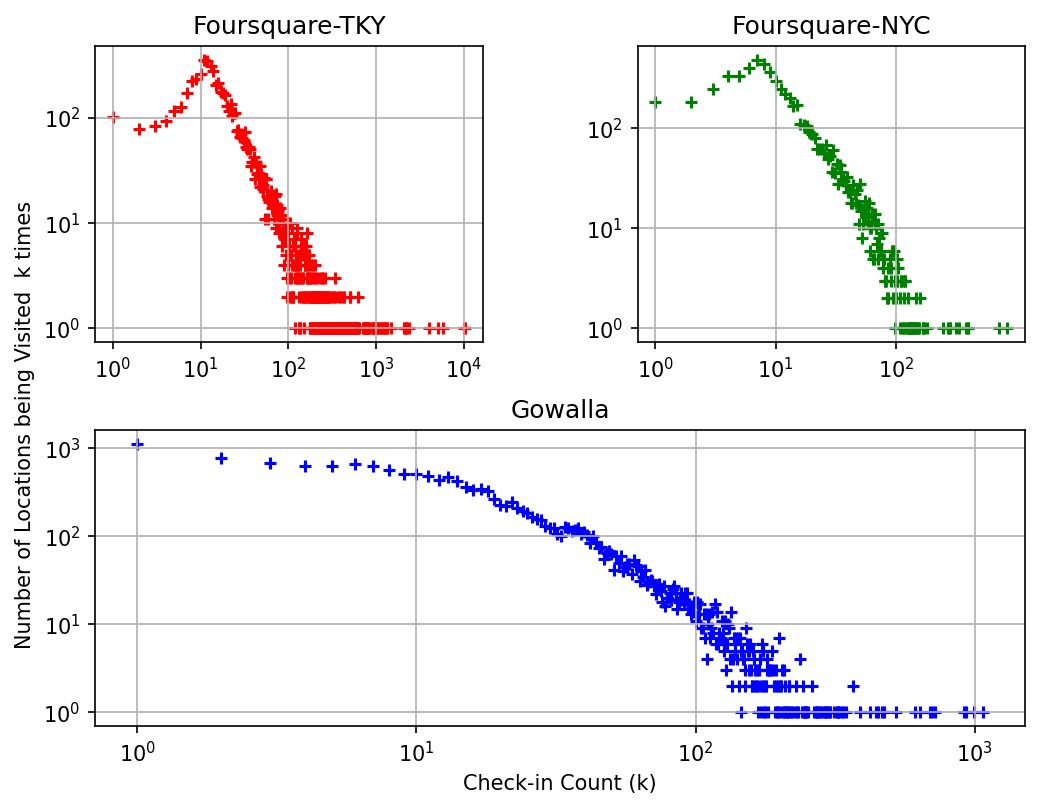

In [155]:
import matplotlib.pyplot as plt
import numpy as np

gowalla_user_item_counts = gowalla_data_csv.groupby(['item_id']).size().reset_index(name='frequency')
gowalla_new_df = gowalla_user_item_counts[['item_id', 'frequency']]


# 根据频率计算每个Check-in Count对应的Number of Locations being Visited k times
gowalla_frequency_counts = gowalla_new_df['frequency'].value_counts()
gowalla_checkin_counts = gowalla_frequency_counts.index
gowalla_locations_counts = gowalla_frequency_counts.values

TKY_user_item_counts = TKY_data_csv.groupby(['item_id']).size().reset_index(name='frequency')
TKY_new_df = TKY_user_item_counts[['item_id', 'frequency']]

# 根据频率计算每个Check-in Count对应的Number of Locations being Visited k times
TKY_frequency_counts = TKY_new_df['frequency'].value_counts()
TKY_checkin_counts = TKY_frequency_counts.index
TKY_locations_counts = TKY_frequency_counts.values

NYC_user_item_counts = NYC_data_csv.groupby(['item_id']).size().reset_index(name='frequency')
NYC_new_df = NYC_user_item_counts[['item_id', 'frequency']]

# 根据频率计算每个Check-in Count对应的Number of Locations being Visited k times
NYC_frequency_counts = NYC_new_df['frequency'].value_counts()
NYC_checkin_counts = NYC_frequency_counts.index
NYC_locations_counts = NYC_frequency_counts.values


grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3) 

# # 绘制流行度信息的对数图
fig = plt.figure(figsize=(8, 6),dpi=150)

# 在GridSpec中指定子图位置
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, :])  # 占据一整行


# plt.xlabel('Check-in Count (k)')
# plt.ylabel('Number of Locations being Visited k times')

# plt.subplot(grid[1, 0:])
ax3.scatter(np.log10(gowalla_checkin_counts), np.log10(gowalla_locations_counts), color='blue', marker='+')
ax3.set_title('Gowalla')
# 自定义横坐标刻度标签为10的3次方
x_ticks = np.arange(0, int(np.log10(gowalla_checkin_counts.max())) + 1, step=1)
x_tick_labels = [f'$10^{i}$' for i in x_ticks]
ax3.set_xticks(x_ticks, x_tick_labels)
y_ticks = np.arange(0, int(np.log10(gowalla_locations_counts.max())) + 1, step=1)
y_tick_labels = [f'$10^{i}$' for i in y_ticks]
ax3.set_yticks(y_ticks, y_tick_labels)
ax3.grid(True)

# plt.subplot(grid[0, 0])
ax1.scatter(np.log10(TKY_checkin_counts), np.log10(TKY_locations_counts), color='red', marker='+')
# plt.xlabel('Check-in Count (k)')
# plt.ylabel('Number of Locations being Visited k times')
ax1.set_title('Foursquare-TKY')
# 自定义横坐标刻度标签为10的3次方
x_ticks = np.arange(0, int(np.log10(TKY_checkin_counts.max())) + 1, step=1)
x_tick_labels = [f'$10^{i}$' for i in x_ticks]
ax1.set_xticks(x_ticks, x_tick_labels)
y_ticks = np.arange(0, int(np.log10(TKY_locations_counts.max())) + 1, step=1)
y_tick_labels = [f'$10^{i}$' for i in y_ticks]
ax1.set_yticks(y_ticks, y_tick_labels)
ax1.grid(True)


# plt.subplot(grid[0, 1])
ax2.scatter(np.log10(NYC_checkin_counts), np.log10(NYC_locations_counts), color='green', marker='+')
# plt.xlabel('Check-in Count (k)')
# plt.ylabel('Number of Locations being Visited k times')
ax2.set_title('Foursquare-NYC')
# 自定义横坐标刻度标签为10的3次方
x_ticks = np.arange(0, int(np.log10(NYC_checkin_counts.max())) + 1, step=1)
x_tick_labels = [f'$10^{i}$' for i in x_ticks]
ax2.set_xticks(x_ticks, x_tick_labels)
y_ticks = np.arange(0, int(np.log10(NYC_locations_counts.max())) + 1, step=1)
y_tick_labels = [f'$10^{i}$' for i in y_ticks]
ax2.set_yticks(y_ticks, y_tick_labels)
ax2.grid(True)

plt.xlabel('Check-in Count (k)')
plt.ylabel('Number of Locations being Visited  k times',y=1.02)
plt.savefig('images/Distribution.png', dpi=300)
plt.show()

In [176]:
paper_seq = TKY_data_csv['item_id']
paper_seq = paper_seq[paper_seq.notnull()]
len(set(paper_seq))

6774

In [303]:
# len(gowalla_data_csv),len(set(gowalla_data_csv['user_id'])),len(set(gowalla_data_csv['item_id']))
# len(TKY_data_csv),len(set(TKY_data_csv['user_id'])),len(set(TKY_data_csv['item_id']))
len(NYC_data_csv),len(set(NYC_data_csv['user_id'])),len(set(NYC_data_csv['item_id']))

(95862, 481, 4407)

In [66]:
import numpy as np

embedding_dict = {}  # 创建一个字典来存储节点嵌入

with open('/data/wanghe/wyx/MHPE/emb/tky_hhner_attnTrue_hour_epochs200_dim256.emb', 'r') as infile:
    dim0, dim1 = infile.readline().strip().split()
#     for i,d in range(int(dim0)):
#         print(d)
    data = [line.strip().split('\t')  for line in infile.readlines()]
#     for line in infile:
#         parts = line.strip().split()
#         node_id = float(parts[0])
# #         print(node_id)
#         embedding = [float(value) for value in parts[1:]]
#         embedding_dict[node_id] = embedding
#         

# 现在 embedding_dict 包含了节点嵌入的信息
# print(np.array(data))
data_5 = np.array(data)
data_5 = torch.tensor(data_5.astype(float)) 
data_5.size()

torch.Size([11000, 256])

/home/wanghe/miniconda3/envs/tran/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/home/wanghe/miniconda3/envs/tran/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/home/wanghe/miniconda3/envs/tran/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/home/wanghe/miniconda3/envs/tran/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-

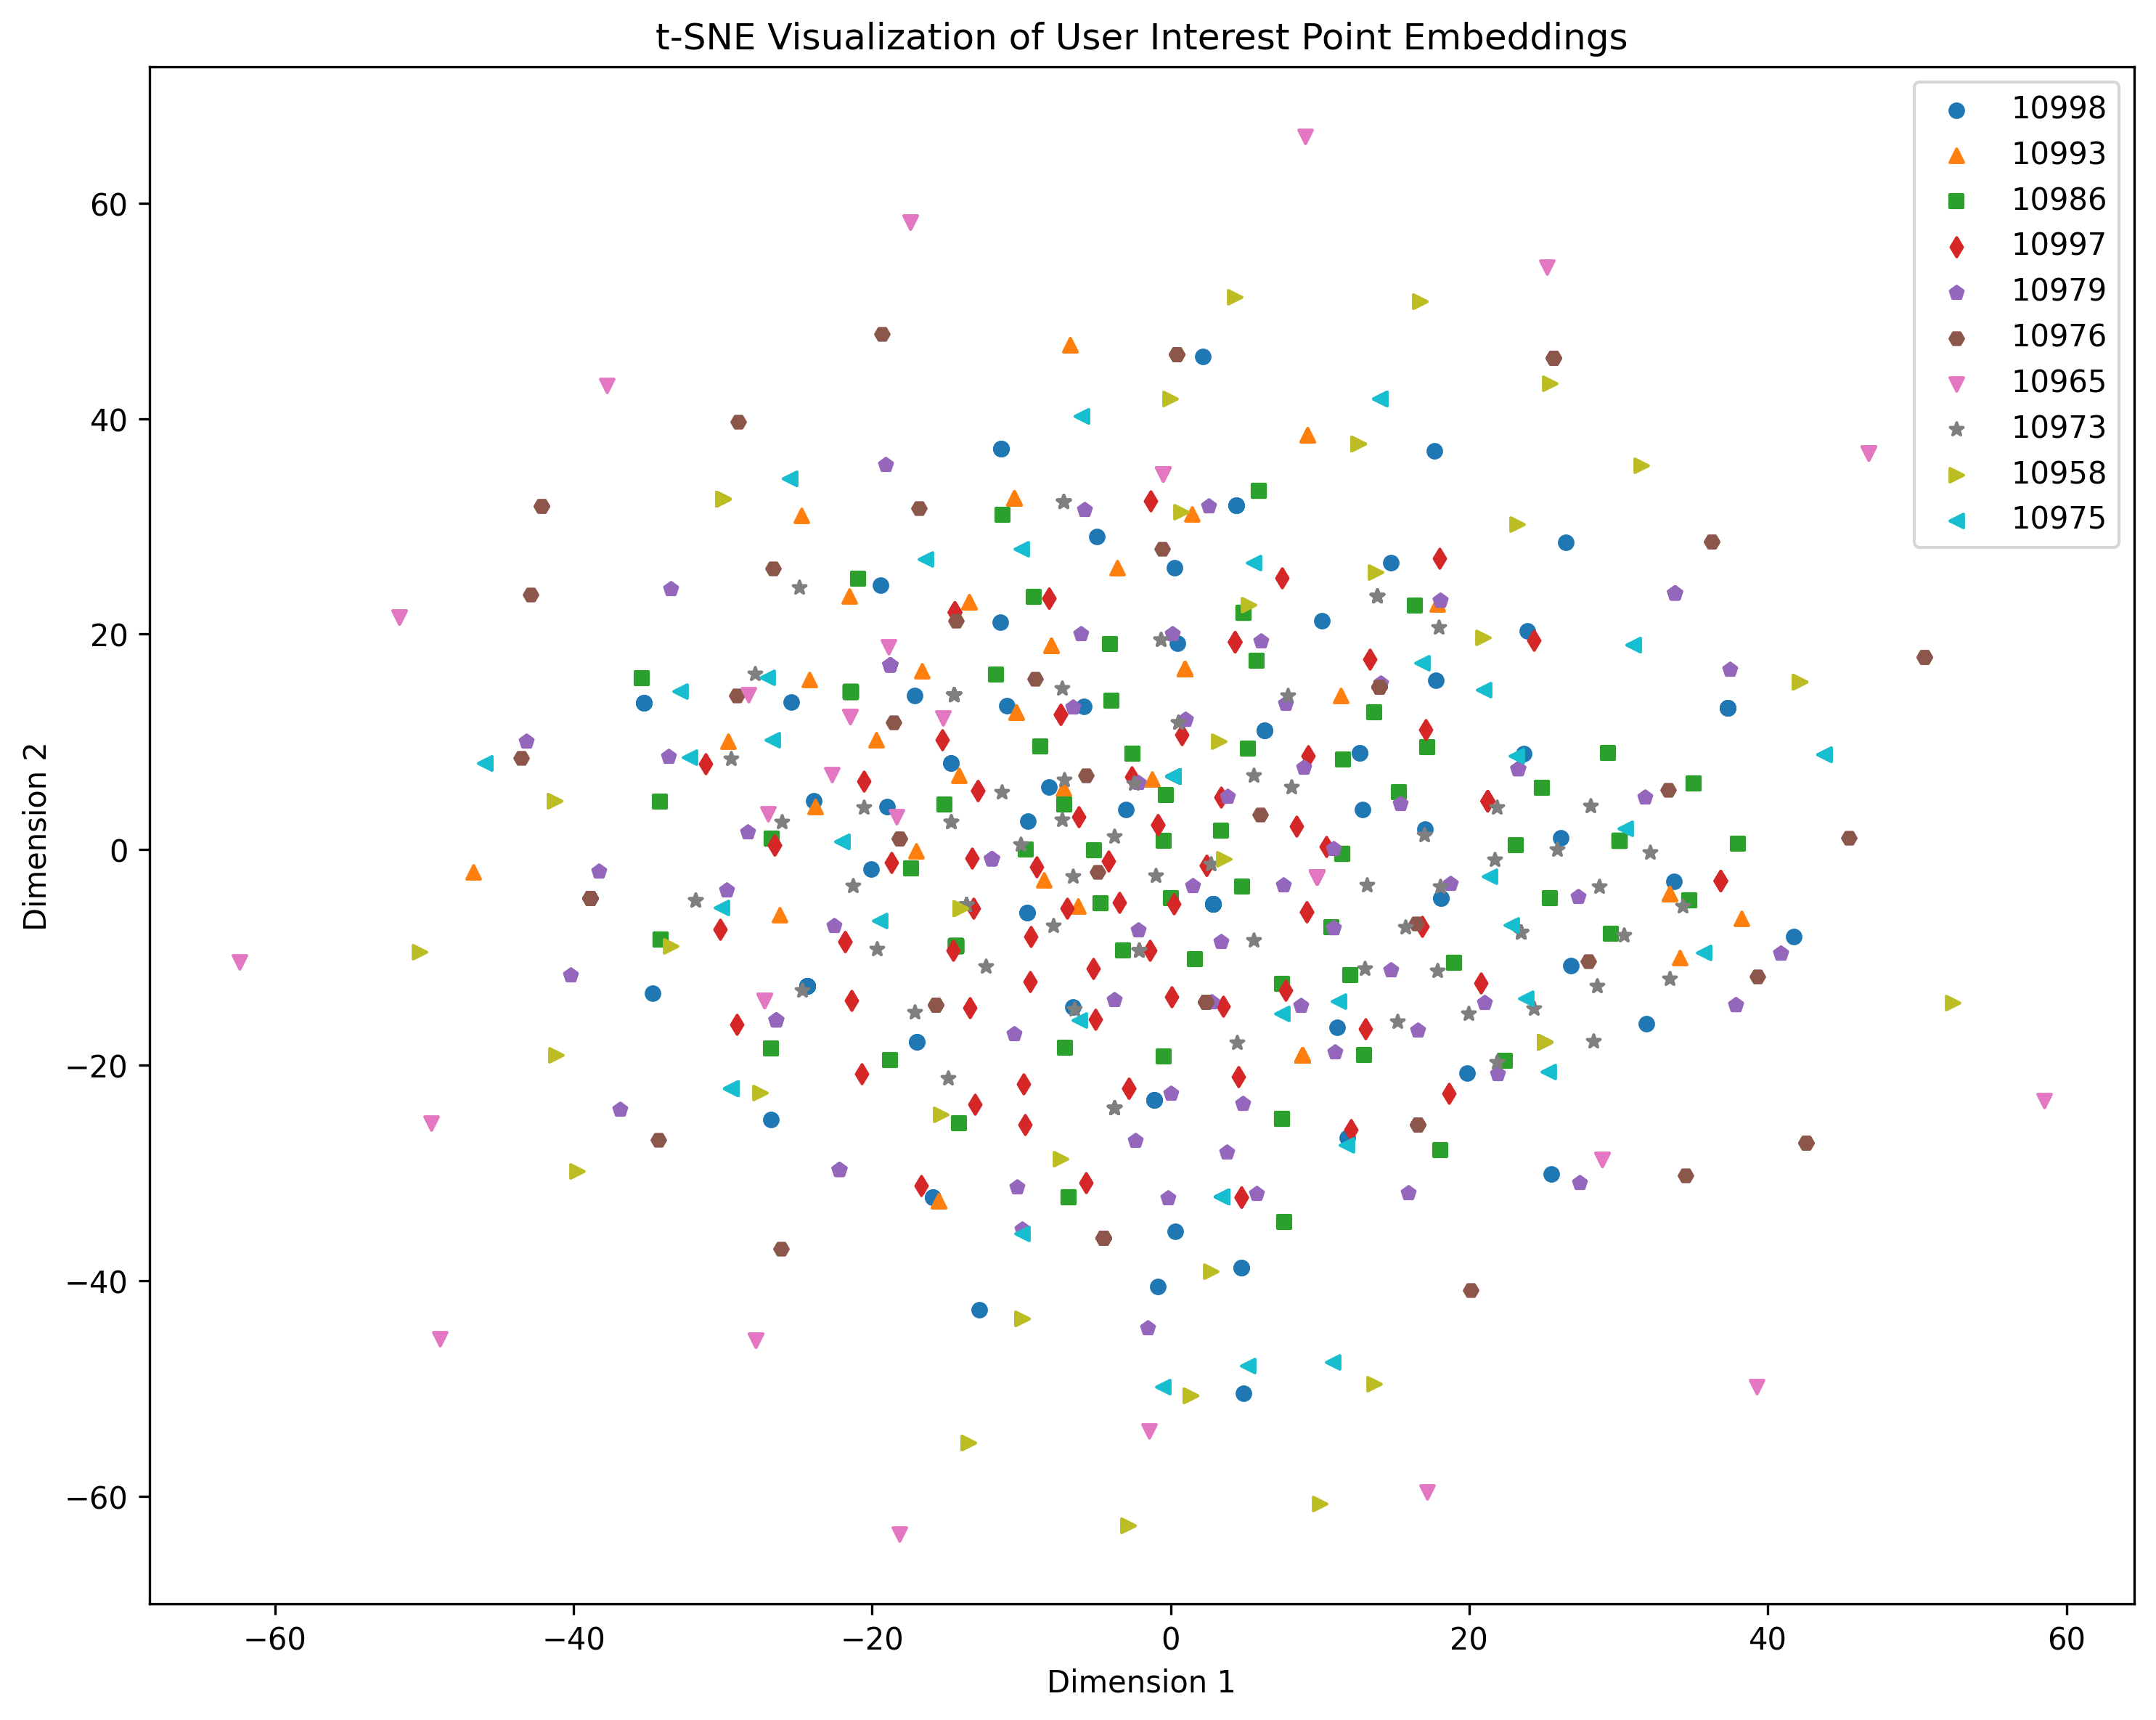

In [72]:
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # 假设有一个字典 embeddings 包含音乐作品嵌入数据，每行为一个嵌入向量

# # 提取嵌入向量为一个 NumPy 数组
# # embeddings = np.array(list(embeddings_dict.values()))
# embeddings = data_5[0:3]
# # 初始化 t-SNE 模型
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# # 对嵌入向量进行降维
# embeddings_2d = tsne.fit_transform(embeddings)

# # 假设有一个字典 artists_tags 包含艺术家标签信息
# # 创建颜色映射表，为每个用户分配一个颜色
# unique_users = user_item_dict.keys()
# num_users = len(unique_users)
# color_map = plt.cm.get_cmap('tab20', num_users)

# # # 创建颜色映射表，根据不同标签分配颜色
# # # color_map = {'0': 'red', '1009': 'blue', 'Jazz': 'green', 'Other': 'gray'}
# # color_map = {'0': 'red', '1009': 'blue'}
# # 绘制 t-SNE 降维结果的散点图，根据标签分配颜色
# plt.figure(figsize=(50, 50))
# for i, (artist, tag) in enumerate(first_10_items.items()):
#     indices = [j for j, t in enumerate(embeddings_2d) if j == i]
#     plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], color=color_map(i % num_users), label=tag, s=20, marker='o')

# plt.title("POI pieces from different users’ visited records.")
# # plt.xlabel("Dimension 1")
# # plt.ylabel("Dimension 2")
# # # plt.legend()
# plt.show()


import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
# 假设你有一个名为 df 的 DataFrame，包含 user_id、item_id 和 embedding 列
# df = ...

# 提取出 10 个用户的数据
selected_users = TKY_data_csv['user_id'].unique()[:10]

# 初始化画布
plt.figure(figsize=(10, 8),dpi=300)

# 创建颜色映射表，为每个用户分配一个颜色
num_users = len(selected_users)
color_map = plt.cm.get_cmap('tab10', num_users)
# 定义不同的标记样式
marker_styles = ['o', '^', 's', 'd', 'p', 'H', 'v', '*', '>', '<']
# 初始化 t-SNE 模型
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300,init='pca',random_state=33, learning_rate='auto') # ,init='pca'
# 遍历每个用户，对其兴趣点嵌入进行 t-SNE 降维并绘制散点图
for i, user_id in enumerate(selected_users):
    user_data = TKY_data_csv[TKY_data_csv['user_id'] == user_id]['item_id'].astype(int).tolist()
#     print(user_data)
    embeddings = data_5[user_data,:]
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color=color_map(i), label=user_id, s=20, marker=marker_styles[i])

# 设置标题和标签
plt.title("t-SNE Visualization of User Interest Point Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

# 显示图形
plt.tight_layout()
plt.savefig('images/digits_tsne-pca-emb.png', dpi=300)
plt.show()
